In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#pip install --upgrade pandas

In [3]:
#pip install --upgrade numpy

In [4]:
df_airline = pd.read_csv('airline_passengers.csv')

In [5]:
df_airline.head(3)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
df_airline.tail(3)

,Month,Thousands of Passengers
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [18]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df_airline.dropna(inplace=True)

In [13]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [14]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [19]:
df_airline.head(3)

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0


In [21]:
df_airline.set_index('Month',inplace=True)
df_airline.head(3)

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0


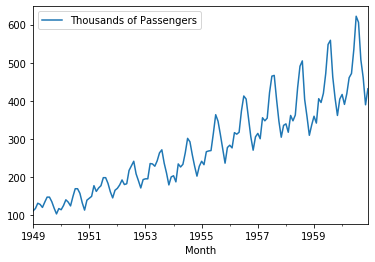

In [22]:
df_airline.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adfuller(df_airline['Thousands of Passengers'])

(0.8153688792060528,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [29]:
def adf_calc(series):
    result = adfuller(series)
    print('ADF Statisctics : {}'.format(result[0]))
    print('p- value {}'.format(result[1]))
    if result[1] <= 0.05:
         print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
adf_calc(df_airline['Thousands of Passengers'])

ADF Statisctics : 0.8153688792060528
p- value 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
df_airline['PassFirstDiff'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [33]:
df_airline.head(3)

,Thousands of Passengers,PassFirstDiff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0


In [34]:
adf_calc(df_airline['PassFirstDiff'].dropna())

ADF Statisctics : -2.829266824169999
p- value 0.05421329028382552
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [35]:
df_airline['PassSecondDiff'] = df_airline['PassFirstDiff'] - df_airline['PassFirstDiff'].shift(1)

In [38]:
adf_calc(df_airline['PassSecondDiff'].dropna())

ADF Statisctics : -16.38423154246854
p- value 2.7328918500140445e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [43]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [45]:
adf_calc(df_airline['Passengers 12 Difference'].dropna())

ADF Statisctics : -3.383020726492481
p- value 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

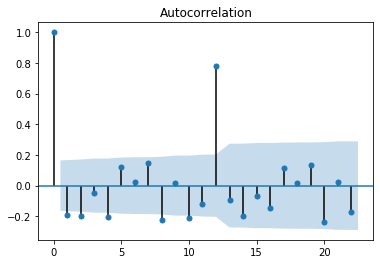

In [42]:
acf = plot_acf(df_airline["PassSecondDiff"].dropna())

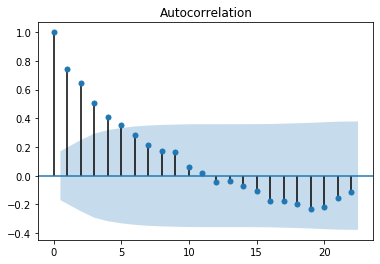

In [47]:
acf12 = plot_acf(df_airline['Passengers 12 Difference'].dropna())

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


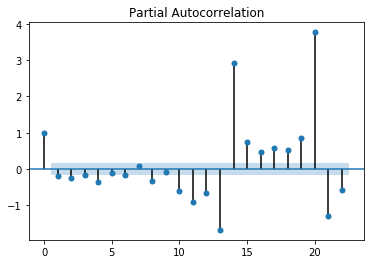

In [49]:
result = plot_pacf(df_airline["PassSecondDiff"].dropna())

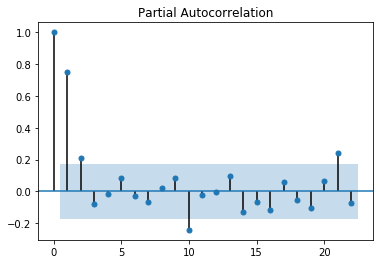

In [50]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [51]:
df_airline

,Thousands of Passengers,PassFirstDiff,PassSecondDiff,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [52]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [53]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [54]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [56]:
test_data.head()

,Thousands of Passengers,PassFirstDiff,PassSecondDiff,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [57]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [59]:
model_Arima_fit=model_ARIMA.fit()

In [60]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Wed, 13 Apr 2022   AIC                            775.563
Time:                                16:44:17   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [61]:
test_data.head()

,Thousands of Passengers,PassFirstDiff,PassSecondDiff,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


In [62]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [63]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [64]:
test_data['Predicted_ARIMA']=pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


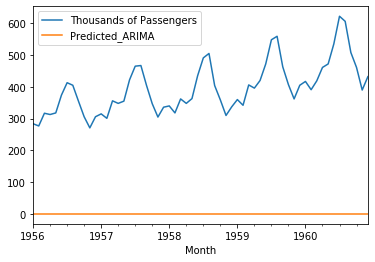

In [66]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

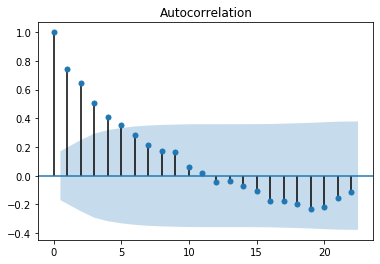

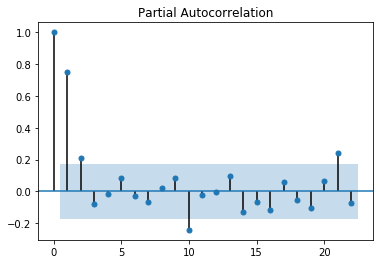

In [67]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [68]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Wed, 13 Apr 2022   AIC                            548.481
Time:                                     16:46:31   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.938      0.639      0.523      -1.240       2.438
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.287
ar.L3         -0.4533      0.894     -0.507      0.612      -2.206       1.300
ma.L1          0.1830      1.164      0.157      0.875      -2.099       2.465
ma.L2         -0.5349      1.262     -0.424      0.672      -3.009       1.939
ma.L3         -0.0985      0.384     -0.257      0.798      -0.851       0.654
ma.L4         -0.1271      0.337     -0.377      0.706      -0.788       0.533
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7253     81.072      1.082      0.279     -71.173     246.624
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

1956-01-01 00:00:00
1960-12-01 00:00:00


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


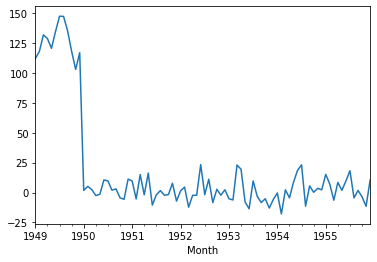

In [70]:
model_SARIMA_fit.resid.plot()

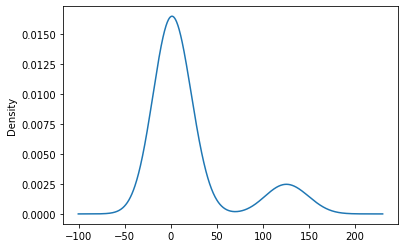

In [71]:
model_SARIMA_fit.resid.plot(kind='kde')

In [72]:
test_data['Predicted_SARIMA']=pred_Sarima

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


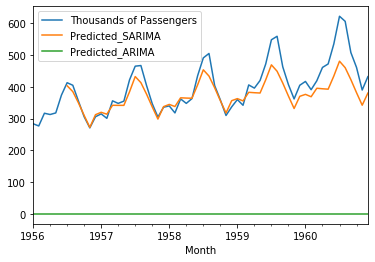

In [73]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()